In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample

from joblib import Parallel, delayed
from IPython import embed

import sys,os 

from src.utils import make_partitions
from src.utils import format_data
import src.modeling as tools
sys.path.append('configs/paper')

In [13]:
import numpy as np
import pandas as pd
import importlib
import tqdm
import sys

In [14]:
importlib.reload(tools)

<module 'src.modeling' from '/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py'>

In [15]:
configs=importlib.import_module('test')

In [37]:
feat_df=pd.read_csv('data/features/paper/egemaps/egemaps_full_audio.csv')
labels_df=pd.read_csv('data/labels/final_labels+speech_ratio.csv')
filter='data/lists/all_audio_complete_set.txt'

In [38]:
df=format_data(feat_df,labels_df,filter)

In [ ]:
#df_train=df.sample(n=8000,replace=True,random_state=42)
#df_val=df[~df['basename'].isin(df_train['basename'])]
#feature_tags=feat_df.columns[~feat_df.columns.isin(['Name','Part','start','end'])]
#label_tags=['neuroticism']
#seed=42
#RF_reg= tools.train_model (df_train,feature_tags,label_tags,seed)

In [ ]:
r2_all,MAE_all,MSE_all,RMSE_all,y_val,predictions= tools.predict(RF_reg,df_val,feature_tags,label_tags)

In [ ]:
df_importance=tools.top_feature_importance(RF_reg.feature_importances_,configs.feature_tags,10)

In [ ]:
feature_tags = {'sr':['speech_ratio'],'frequency' : [
            'F0semitoneFrom27.5Hz_sma3nz_amean',
            'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
            'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
            'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
            'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
            'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
            'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
            'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
            'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
            'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
            'jitterLocal_sma3nz_amean',
            'jitterLocal_sma3nz_stddevNorm',
            'F1frequency_sma3nz_amean',
            'F1frequency_sma3nz_stddevNorm',
            'F1bandwidth_sma3nz_amean',
            'F1bandwidth_sma3nz_stddevNorm',
            'F2frequency_sma3nz_amean',
            'F2frequency_sma3nz_stddevNorm',
            'F2bandwidth_sma3nz_amean',
            'F2bandwidth_sma3nz_stddevNorm',
            'F3frequency_sma3nz_amean',
            'F3frequency_sma3nz_stddevNorm',
            'F3bandwidth_sma3nz_amean',
            'F3bandwidth_sma3nz_stddevNorm'
            ],
        
        'energy' : [
            'shimmerLocaldB_sma3nz_amean',
            'shimmerLocaldB_sma3nz_stddevNorm',
            'loudness_sma3_amean',
            'loudness_sma3_stddevNorm',
            'loudness_sma3_percentile20.0',
            'loudness_sma3_percentile50.0',
            'loudness_sma3_percentile80.0',
            'loudness_sma3_pctlrange0-2',
            'loudness_sma3_meanRisingSlope',
            'loudness_sma3_stddevRisingSlope',
            'loudness_sma3_meanFallingSlope',
            'loudness_sma3_stddevFallingSlope',
            'HNRdBACF_sma3nz_amean',
            'HNRdBACF_sma3nz_stddevNorm',
            'equivalentSoundLevel_dBp'
            ],
        
        'spectral' : [
            'F1amplitudeLogRelF0_sma3nz_amean',
            'F1amplitudeLogRelF0_sma3nz_stddevNorm',
            'F2amplitudeLogRelF0_sma3nz_amean',
            'F2amplitudeLogRelF0_sma3nz_stddevNorm',
            'F3amplitudeLogRelF0_sma3nz_amean',
            'F3amplitudeLogRelF0_sma3nz_stddevNorm',
            'logRelF0-H1-H2_sma3nz_amean',
            'logRelF0-H1-H2_sma3nz_stddevNorm',
            'logRelF0-H1-A3_sma3nz_amean',
            'logRelF0-H1-A3_sma3nz_stddevNorm',
            'spectralFlux_sma3_amean',
            'spectralFlux_sma3_stddevNorm',
            'mfcc1_sma3_amean',
            'mfcc1_sma3_stddevNorm',
            'mfcc2_sma3_amean',
            'mfcc2_sma3_stddevNorm',
            'mfcc3_sma3_amean',
            'mfcc3_sma3_stddevNorm',
            'mfcc4_sma3_amean',
            'mfcc4_sma3_stddevNorm'
            ],
        
        'spectral_voiced' : [
            'alphaRatioV_sma3nz_amean',
            'alphaRatioV_sma3nz_stddevNorm',
            'hammarbergIndexV_sma3nz_amean',
            'hammarbergIndexV_sma3nz_stddevNorm',
            'slopeV0-500_sma3nz_amean',
            'slopeV0-500_sma3nz_stddevNorm',
            'slopeV500-1500_sma3nz_amean',
            'slopeV500-1500_sma3nz_stddevNorm',
            'mfcc1V_sma3nz_amean',
            'mfcc1V_sma3nz_stddevNorm',
            'mfcc2V_sma3nz_amean',
            'mfcc2V_sma3nz_stddevNorm',
            'mfcc3V_sma3nz_amean',
            'mfcc3V_sma3nz_stddevNorm',
            'mfcc4V_sma3nz_amean',
            'mfcc4V_sma3nz_stddevNorm',
            'spectralFluxV_sma3nz_amean',
            'spectralFluxV_sma3nz_stddevNorm'
            ],
        
        'unvoiced' : [
            'alphaRatioUV_sma3nz_amean',
            'hammarbergIndexUV_sma3nz_amean',
            'slopeUV0-500_sma3nz_amean',
            'slopeUV500-1500_sma3nz_amean',
            'spectralFluxUV_sma3nz_amean'
            ],
        
        'temporal' : [
            'VoicedSegmentsPerSec',
            'MeanUnvoicedSegmentLength',
            'StddevUnvoicedSegmentLength',
            'loudnessPeaksPerSec',
            'MeanVoicedSegmentLengthSec',
            'StddevVoicedSegmentLengthSec'
            ]}

In [ ]:
list_final=[]
feature_names=feature_tags.keys()

for i in range(1,len(feature_names)+1):
    c=list(combinations(feature_names,i))
    list_final.extend(c)

In [ ]:
dict_final={}
for combination in list_final:        
    iteration=[]
    label=''
    for subgroup in combination:
        label=label+'+'+subgroup
        iteration.extend(feature_tags[subgroup])
    dict_final.update({label[1:]:iteration})    

In [45]:
data_path = 'data/features/paper/egemaps'
labels_df=pd.read_csv('data/labels/final_labels+speech_ratio.csv')
feature_list=['egemaps_full_audio.csv',
        'egemaps_speech.csv']

features=[os.path.join(data_path,i) for i in feature_list]


feature_df=pd.read_csv(features[0])

speech_ratio=True

if speech_ratio:
    feature_df=pd.merge(feature_df,labels_df[['filename','speech_ratio']],left_on='Name',right_on='filename').drop(columns='filename')

features_=feature_df.columns[~feature_df.columns.isin(['Name','Part','start','end'])]

In [39]:
df=df.drop(columns=['end','start'])

In [28]:
import seaborn as sns

In [40]:
df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,labels_mean,silero_speech_rate>0.5,silero_speech_rate>0.6,silero_speech_rate>0.7,silero_speech_rate>0.8,silero_speech_rate>0.9,ethnicity,gender,music,speech_ratio
0,28.555597,0.142758,26.050373,28.445818,31.695473,5.645100,95.79164,151.769350,200.642600,424.137480,...,0.551203,1.0,1.0,1.0,1.0,0.0,1,1,1.0,0.715733
1,25.437416,0.118676,23.314940,24.662346,27.101017,3.786078,182.43639,279.580140,15.837670,15.720761,...,0.676546,1.0,1.0,1.0,1.0,1.0,2,1,1.0,1.020133
2,29.339521,0.184588,24.877699,28.751135,31.602173,6.724474,142.43018,126.164406,127.908600,170.744170,...,0.426373,1.0,1.0,1.0,1.0,1.0,2,1,0.0,0.910533
3,35.493748,0.091536,33.833320,34.787876,36.408348,2.575028,60.92558,88.925610,69.223860,108.360620,...,0.569686,1.0,1.0,1.0,1.0,1.0,2,2,0.0,0.938533
4,34.266273,0.054921,32.758440,34.094530,35.460777,2.702339,76.99808,172.954070,11.140180,4.669520,...,0.827402,1.0,1.0,1.0,1.0,1.0,2,2,0.0,1.020133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,31.135231,0.181546,30.056902,31.607304,34.683598,4.626696,711.86560,609.100100,42.808525,23.464582,...,0.486932,1.0,1.0,1.0,0.0,0.0,3,2,1.0,0.929200
9994,30.324749,0.122509,27.589123,29.973135,32.715120,5.125996,148.51462,188.220550,50.419060,70.443360,...,0.554727,1.0,1.0,0.0,0.0,0.0,2,1,0.0,0.990133
9995,38.633015,0.052528,37.319120,38.215225,39.210640,1.891522,51.73182,51.737625,1.739276,7.429319,...,0.443899,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.934133
9996,36.520320,0.164202,31.714865,33.813630,41.838940,10.124075,342.53543,438.245150,152.788990,213.031900,...,0.615517,1.0,1.0,0.0,0.0,0.0,3,2,0.0,0.878133


In [51]:
xs=[df.loc[i,features_].values for i in df.index]
ys=[df.loc[i,labels].values for i in df.index]

In [58]:
labels=['extraversion',
 'neuroticism',
 'agreeableness',
 'conscientiousness',
 'openness']

In [61]:
import IPython.display as plt

In [63]:
for x, y in zip(xs, ys):
   plt.scatter(xs, ys, cmap="copper")
plt.show()

AttributeError: module 'IPython.display' has no attribute 'scatter'

In [43]:
sns.scatterplot(data=df, x=df['speech_ratio'], y=df[['extraversion','agreeableness']])

ValueError: Data must be 1-dimensional

In [70]:
labels

['extraversion',
 'neuroticism',
 'agreeableness',
 'conscientiousness',
 'openness']

In [83]:
df[features_[1]]

0       0.142758
1       0.118676
2       0.184588
3       0.091536
4       0.054921
          ...   
9993    0.181546
9994    0.122509
9995    0.052528
9996    0.164202
9997    0.293669
Name: F0semitoneFrom27.5Hz_sma3nz_stddevNorm, Length: 9998, dtype: float64

In [82]:
df[labels[0]]

0       0.514019
1       0.654206
2       0.429907
3       0.476636
4       0.887850
          ...   
9993    0.448598
9994    0.514019
9995    0.364486
9996    0.429907
9997    0.177570
Name: extraversion, Length: 9998, dtype: float64

<AxesSubplot:xlabel='speech_ratio', ylabel='labels_mean'>

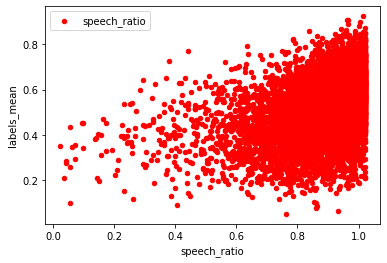

In [100]:
df.plot(kind='scatter', x='speech_ratio', y='labels_mean', color='r', label='speech_ratio')

<AxesSubplot:xlabel='speech_ratio', ylabel='extraversion'>

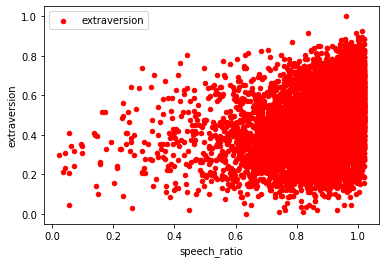

In [103]:
df.plot(kind='scatter', x='speech_ratio', y='extraversion', color='r', label='extraversion')

<AxesSubplot:xlabel='speech_ratio', ylabel='agreeableness'>

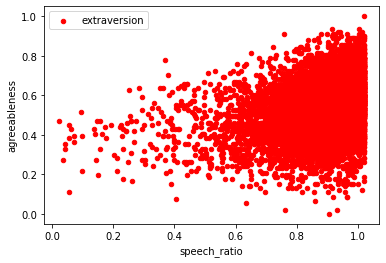

In [104]:
df.plot(kind='scatter', x='speech_ratio', y='agreeableness', color='r', label='extraversion')

<AxesSubplot:xlabel='speech_ratio', ylabel='openness'>

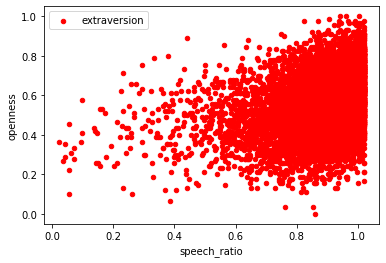

In [105]:
df.plot(kind='scatter', x='speech_ratio', y='openness', color='r', label='extraversion')

<AxesSubplot:xlabel='speech_ratio', ylabel='neuroticism'>

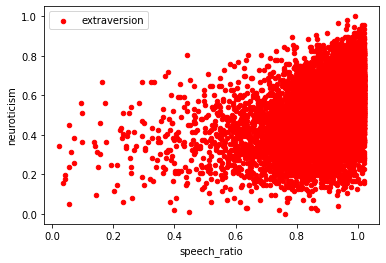

In [106]:
df.plot(kind='scatter', x='speech_ratio', y='neuroticism', color='r', label='extraversion')

<AxesSubplot:xlabel='speech_ratio', ylabel='conscientiousness'>

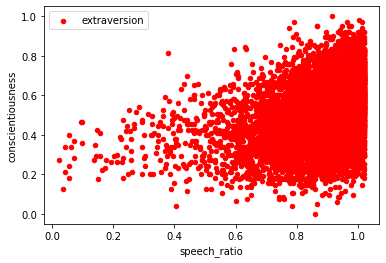

In [107]:
df.plot(kind='scatter', x='speech_ratio', y='conscientiousness', color='r', label='extraversion')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='labels_mean'>

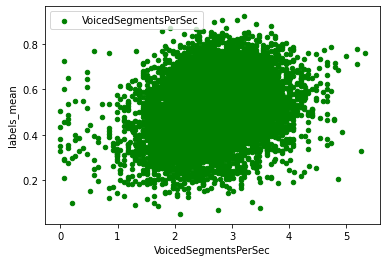

In [101]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='labels_mean', color='g', label='VoicedSegmentsPerSec')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='extraversion'>

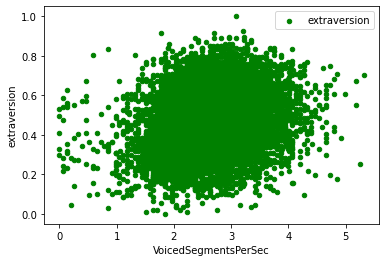

In [109]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='extraversion', color='g', label='extraversion')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='openness'>

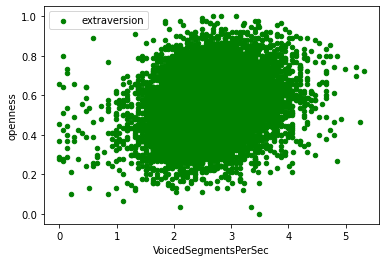

In [110]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='openness', color='g', label='extraversion')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='neuroticism'>

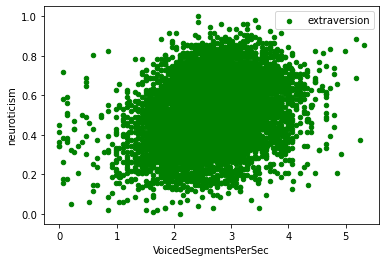

In [111]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='neuroticism', color='g', label='extraversion')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='conscientiousness'>

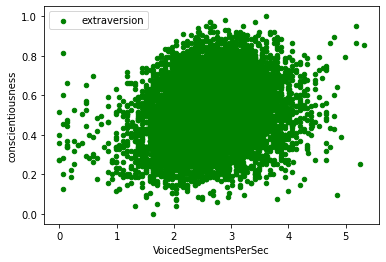

In [112]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='conscientiousness', color='g', label='extraversion')

<AxesSubplot:xlabel='VoicedSegmentsPerSec', ylabel='agreeableness'>

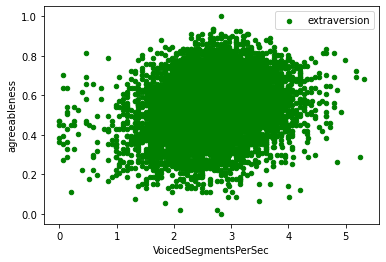

In [113]:
df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='agreeableness', color='g', label='extraversion')

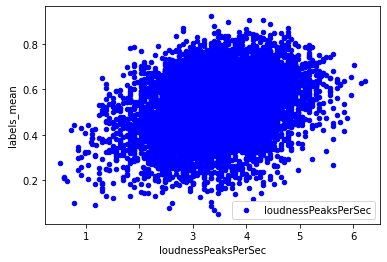

In [102]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='labels_mean', color='b', label='loudnessPeaksPerSec')

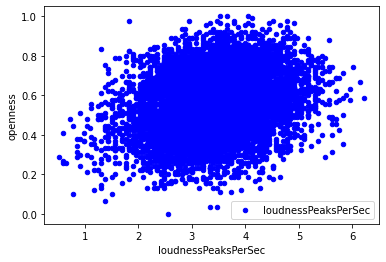

In [114]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='openness', color='b', label='loudnessPeaksPerSec')

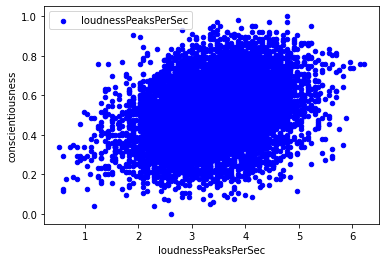

In [115]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='conscientiousness', color='b', label='loudnessPeaksPerSec')

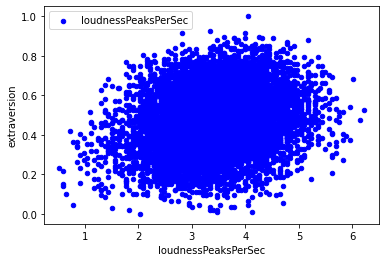

In [116]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='extraversion', color='b', label='loudnessPeaksPerSec')

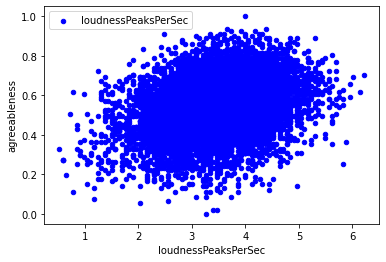

In [117]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='agreeableness', color='b', label='loudnessPeaksPerSec')

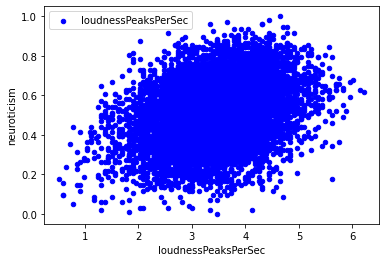

In [118]:
ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='neuroticism', color='b', label='loudnessPeaksPerSec')

In [130]:
data = df[['loudnessPeaksPerSec','neuroticism']]
correlation = data.corr(method='pearson')

In [131]:
correlation

,loudnessPeaksPerSec,neuroticism
loudnessPeaksPerSec,1.000000,0.336103
neuroticism,0.336103,1.000000


Text(0, 0.5, 'labels_mean_value')

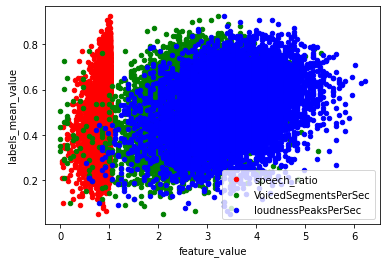

In [99]:
#create scatter plot of A_assists vs. A_points
plt.figsize((12,8))
ax1=df.plot(kind='scatter', x='speech_ratio', y='labels_mean', color='r', label='speech_ratio')

#add scatter plot on same graph using B_assists vs. B_points
ax2=df.plot(kind='scatter', x='VoicedSegmentsPerSec', y='labels_mean', color='g', label='VoicedSegmentsPerSec',ax=ax1)

ax2=df.plot(kind='scatter', x='loudnessPeaksPerSec', y='labels_mean', color='b', label='loudnessPeaksPerSec',ax=ax2)

#specify x-axis and y-axis labels
ax1.set_xlabel('feature_value')
ax1.set_ylabel('labels_mean_value')

In [1]:
import pandas as pd

In [2]:
with open ('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/Trust-V2_dataset/free_speech_paths.txt') as file:
    a=file.read().splitlines()

In [3]:
a

['Trust-UBA-V2/dataset/37/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/43/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/10/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/23/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/11/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/12/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/40/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/72/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/24/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/49/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/75/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/34/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/82/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/61/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/48/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/76/voice_recordings/free_speech.wav',
 'Trust-UBA-V2/dataset/2